In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url, header = 0)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:

# First off, let's use only numeric data:

df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:

# Drop the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models

df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis =1, inplace = True)

In [6]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:

# Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

In [8]:

#         FUNCTIONS FOR PLOTTING


In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [10]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    # lr: linear regression object
    #poly_transform : polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [11]:


#               PART 1: TRAINING AND TESTING



In [12]:

# An import step in testing your model is to split your data into training and testing data. 

# We will place the target data 'price' in a separate dataframe y_data:
y_data = df['price']


In [13]:
# Drop price data in dataframe x_data:

x_data = df.drop('price',axis=1)

In [14]:
 
# Now we randomly split our data into training and testing data using the function train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state =1)

print('number of test samples :', x_test.shape[0])
print("number of training samples:", x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [15]:

# Q1: Split up the dataset such that 40% of the data will be utilized for testing.
#     Set the parameter 'random_state' equal to zero. The output of the function should
#     be the following: "x_train1", "x_test1", "y_train1" and "y_test1".


x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0)

print('number of test samples :', x_test1.shape[0])
print('number of training samples:', x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [16]:

# Import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

In [17]:

# Create a linear regression object:
lre = LinearRegression()

In [18]:


# Fit the model using the feature "horsepower":

lre.fit(x_train[['horsepower']], y_train)


LinearRegression()

In [19]:

# Calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [20]:

# We can see the R^2 is much smaller  using the test data compared to the training data:

lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [21]:

#    Q2: Find the R^2 on the test data using 40% of the dataset for testing:
lre.score(x_test1[['horsepower']], y_test1)

0.7565592251392638

In [22]:

#              CROSS-VALIDATION SCORE


#  Sometimes you dont not have sufficient testing data; as a result,
#  you may want to perform cross-validation.


In [23]:

# imprt cross_val_score from the module model_selection:
from sklearn.model_selection import cross_val_score

In [24]:

# Input the object, feature ('horsepower') and the target data (y_data).
# cv will be 4 (i.e. no. of folds)

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [25]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [26]:

# To calculate the average and standard deviation of our estimate:

print("The mean of the folds are", Rcross.mean(), "and the Standard deviation is", Rcross.std())

The mean of the folds are 0.522009915042119 and the Standard deviation is 0.2911839444756029


In [27]:

# Using negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, scoring = 'neg_mean_squared_error')


array([18982700.02615235, 57082774.35405644, 20393381.56613285,
        6877569.20187989, 20777198.94428747])

In [28]:

#  Q3. Calculate the average R^2 using two folds, then find
#      the average R^2 for the second fold utilizing the 'horsepower' feature:

Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)

Rcross1.mean()


0.5166761697127429

In [29]:

# Using 'cross_val_predict' to predict the output.
# It splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

from sklearn.model_selection import cross_val_predict # imports the function


In [30]:

# Input the object, the feature "horsepower" and the target data y_data.
# The parameter 'cv' determines the number of folds (it will be 4 for now):

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv =4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [31]:


#        OVERFITTING, UNDERFITTNG AND MODEL SELECTION



In [32]:
# Create MLR objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features:

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [33]:

# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [34]:

# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [35]:


# Let's perform some model evaluation using our training and testing data separately.

# import the seaborn and matplotlib library for plotting:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


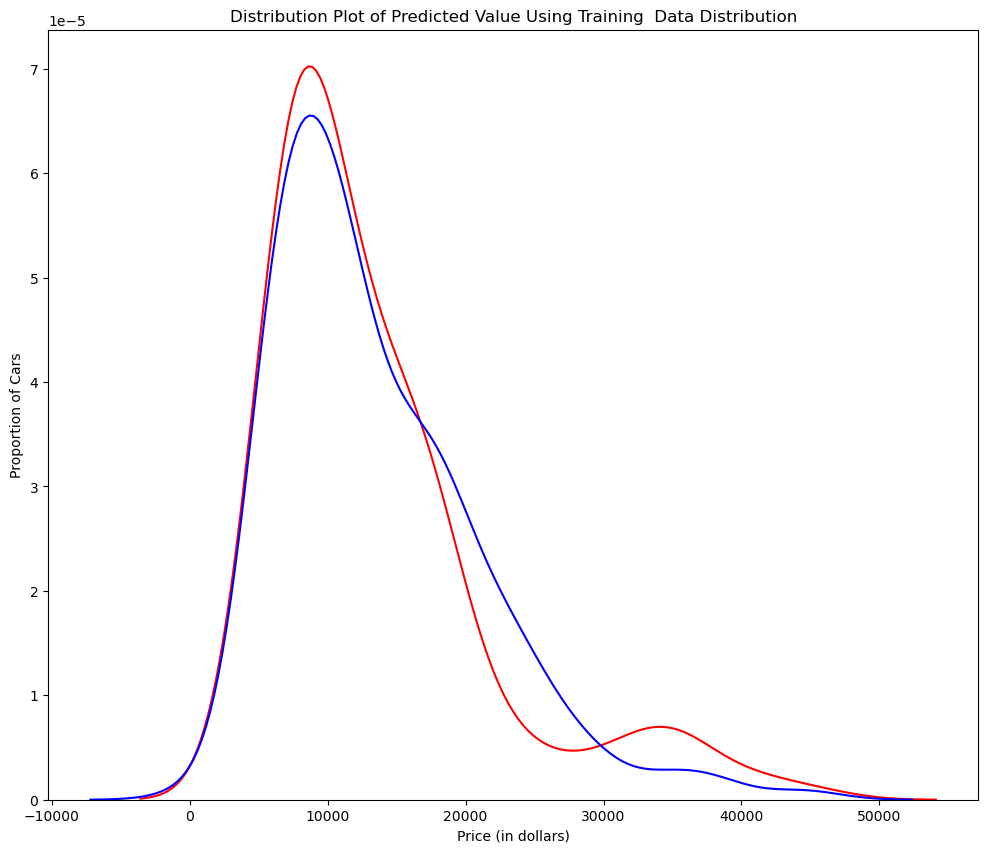

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data


In [36]:

# Examining the distribution of the predicted values of the training data:

Title = 'Distribution Plot of Predicted Value Using Training  Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

print ("Figure 1: Plot of predicted values using the training data compared to the actual values of the training data")

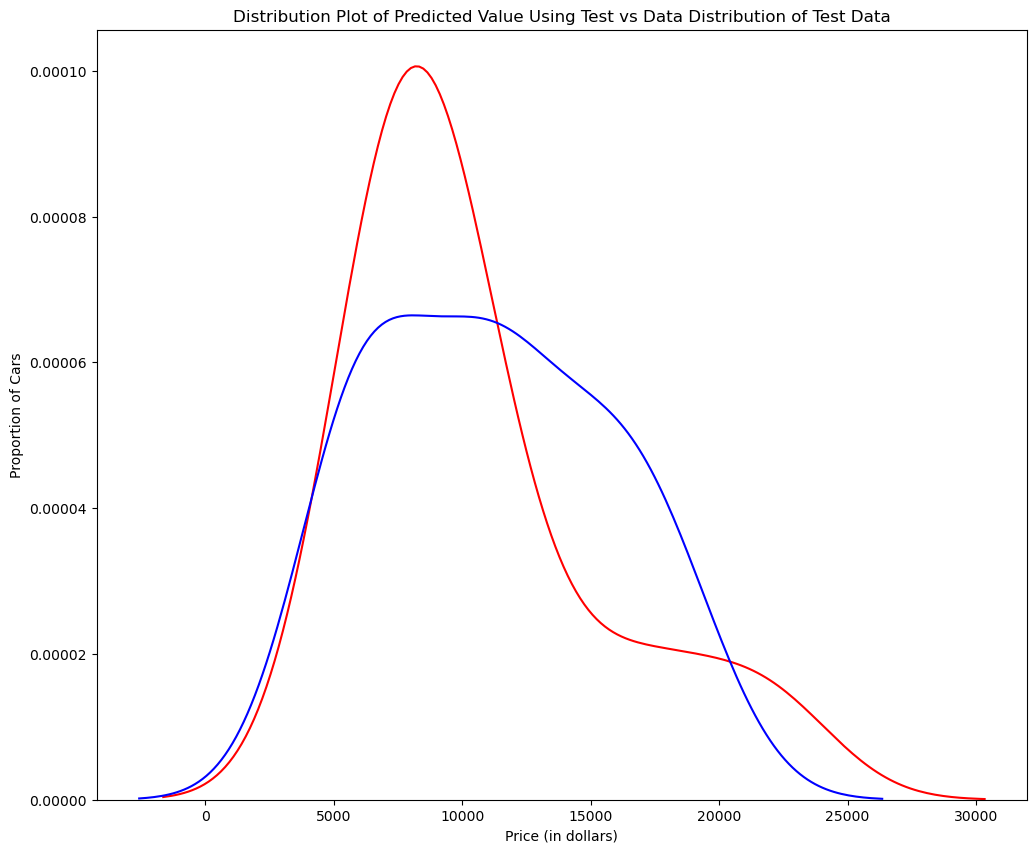

Figure 1: Plot of predicted value using the test data compared to the actual values of the test data


In [37]:

# Examining the distribution of the predicted values of the testing data:

Title = 'Distribution Plot of Predicted Value Using Test vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

print ("Figure 1: Plot of predicted value using the test data compared to the actual values of the test data")

In [38]:


# Let's see if polynomial regression also exihibits a drop in the prediction accuracy when analysing the test dataset.

from sklearn.preprocessing import PolynomialFeatures


In [39]:


#                  OVERFITTING

#  This occurs when the model fits the noise, but not the underlying process.

# Let's create a degree 5 polynomial model.

In [40]:

# Using 55 pervent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state =0)


In [41]:

# Perform a degree 5 polynomial transformation on the feature 'horsepower'.

pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [42]:

# Creating a Linear Regression model 'poly' and trains it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [43]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70591245,  7308.0293325 , 12213.78503102, 18893.18944398,
       19995.88763308])

In [44]:

# let's take the first 5 predicted values and compare it to the actual targets:

print("Predicted Values:", yhat[0:4])
print("True values:", y_test[0:4].values)


Predicted Values: [ 6728.70591245  7308.0293325  12213.78503102 18893.18944398]
True values: [ 6295. 10698. 13860. 13499.]


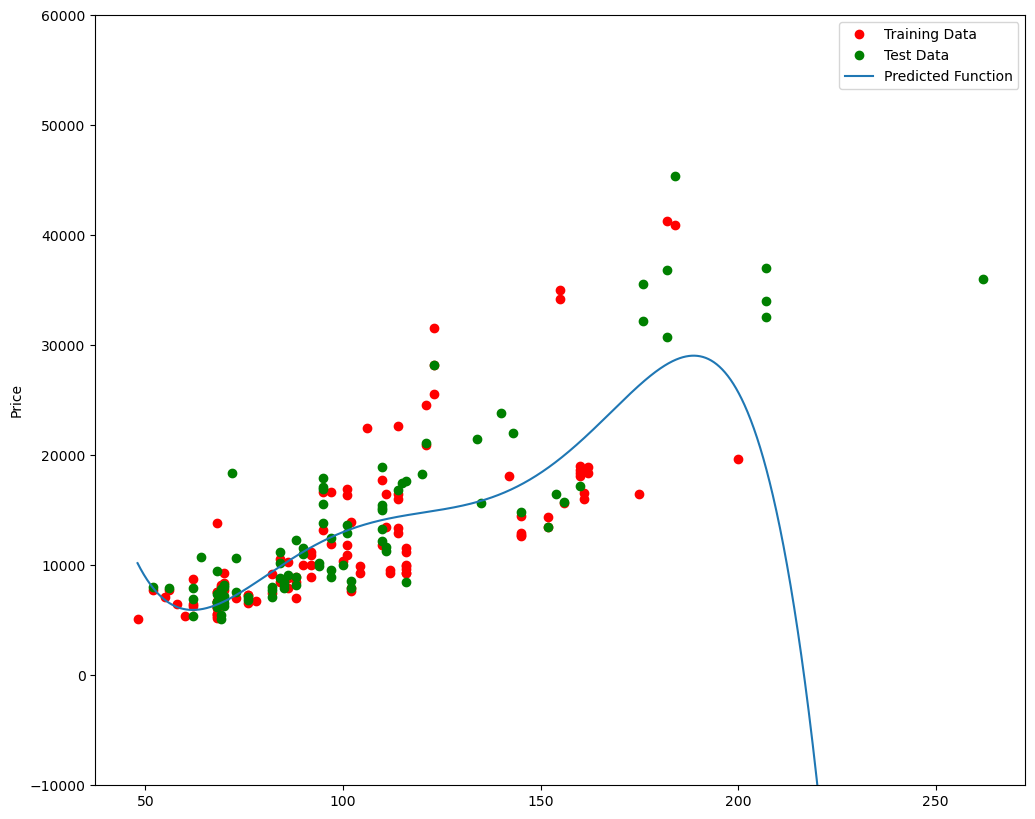

In [45]:

# Using the function "PollyPlot" to display the training data, testing_data, and predicted function:

PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [46]:

# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716902637501

In [47]:

# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871424242023895

In [48]:
# the r^2 shows a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

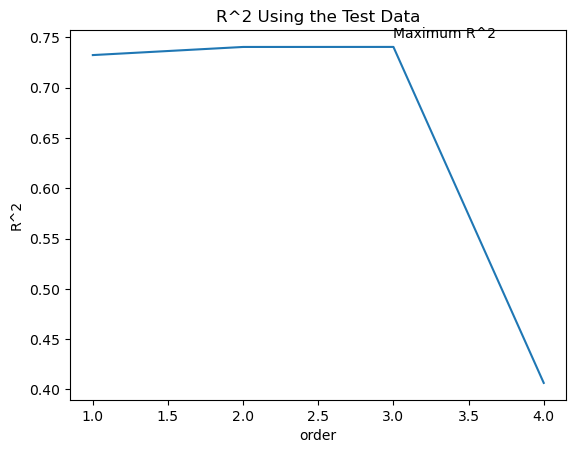

In [49]:

# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using the Test Data')
plt.text(3, 0.75, 'Maximum R^2')

In [50]:


def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state =0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [51]:

# This interface allows you to experiment with different polynomial orders and different amounts of data:

interact(f, order=(0, 6, 1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [52]:

#   Q4. a) Create a "PolynomialFeatures" object "pr1" of degree two:
pr1 = PolynomialFeatures(degree= 2)
pr1


PolynomialFeatures()

In [53]:

#   Q4. b) Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.

x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [56]:

#   Q4. c) How many dimenesions does the new feature have? Use the attribute 'shape':
x_train_pr1.shape

(110, 15)

In [57]:
print("the are now 15 features")

the are now 15 features


In [58]:

#   Q4. d) Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

poly1 = LinearRegression().fit(x_train_pr1, y_train)



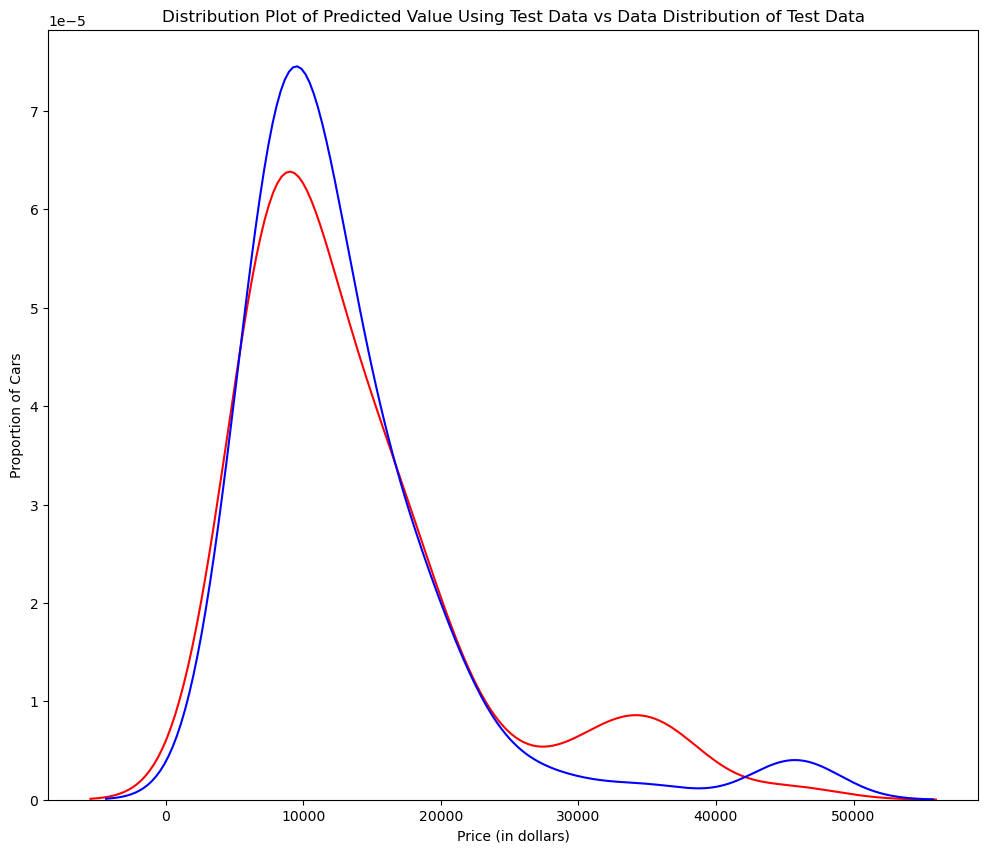

In [61]:

#   Q4. e) Use the method "predict" to predict an output on the polynomial featues,
#          then use the functioin "DistributionPlot" to display the distribution of the predicted test output vs. th actual test data.

yhat_test1 = poly1.predict(x_test_pr1)

Title = "Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data"

DistributionPlot(y_test, yhat_test1, "Actual Values(Test)", "Predicted Values (Test)", Title)

In [62]:
# The predicted value is higher than actual value for cars where the price $10,000 range,
# conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range.
# As such the model is not as accurate in these ranges

In [63]:


#               PART 3: RIDGE REGRESSION



In [64]:

# Let's perform a degree two polynomial transformation on our data:

pr = PolynomialFeatures(degree =2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [65]:

from sklearn.linear_model import Ridge  # imports Ridge form the module linear models.

In [66]:

# Creating a Ridge regression object, setting the regularization parameter (alpha) to 0.1

RigeModel = Ridge(alpha=0.1)

In [68]:

# Fitting the model using the method fit:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [69]:
print('predicted: ', yhat[0:4])
print('test set: ', y_test[0:4].values)

predicted:  [ 6728.70591245  7308.0293325  12213.78503102 18893.18944398]
test set:  [ 6295. 10698. 13860. 13499.]


In [71]:

# We select the value of alpha that minimizes the test error.
# To do so, we can use a for loop. We have also created a progress bar to see how
# many iterations we have completed so far:

from tqdm import tqdm # imports tqdm (it is a library that creates a progress bar for loops)

# Initializing Lists:
Rsqu_test = [] # this list will store the R^2 scores for the test sets
Rsqu_train = [] # this list will store the R^2 scores for the training sets
dummy1 = []

# Creating alpha values:
Alpha = 10 * np.array(range(0,1000)) # Creates a range of alpha values from 0 to 9990, incrementing by 10.

pbar = tqdm(Alpha) # creating a progress bar for alpha values

for alpha in pbar: # this loop iterates over each value of alpha in the progress bar.
    RigeModel = Ridge(alpha=alpha)    # creates a Ridge regression model with the current alpha value.
    RigeModel.fit(x_train_pr, y_train)  # fits the model
    
    # Calculates the R^2 scores for the test and training set and stored:
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    #Updates the progress bar to display the current test and training scores:
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    #Append Scores to Lists:
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 120.06it/s, Test Score=0.564, Train Score=0.859]


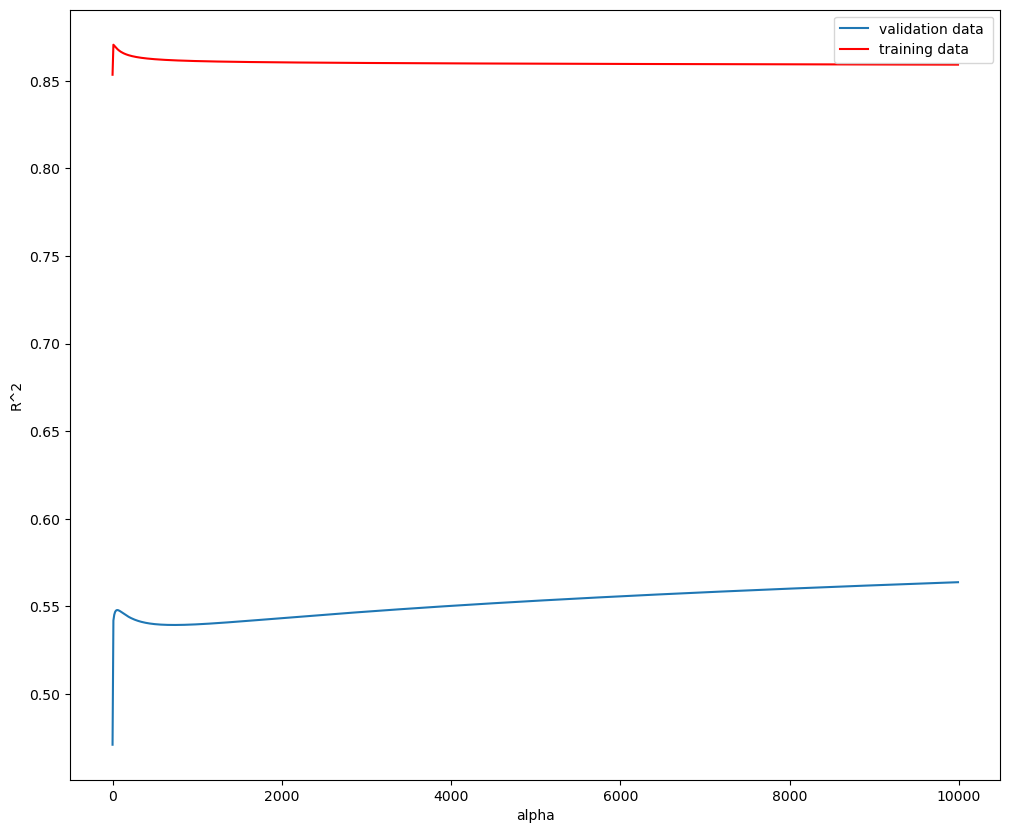

In [72]:

# Plotting out the value of R^2 for different alphas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label = 'validation data ')
plt.plot(Alpha, Rsqu_train, 'r', label = 'training data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


In [73]:

#  Q5. Perform Ridge regression. Calculate the R^2 using the polynomial features,
#      use the training data to train the model and use the test data to test the model. 
#      The parameter alpha should be set to 10.

RigeModel_1 = Ridge (alpha = 10)
RigeModel_1.fit(x_test_pr, y_test)  # trains the model
RigeModel_1.score(x_test_pr, y_test)  # tests the model by getting the R^2

0.9208823546434193

In [74]:


#                      GRID SEARCH

#  Sklearn has the class 'GridSearchCV' to make the process of finding
#  the best hyperparameter simpler


In [75]:

# importing GridSearchCV from the module model_selection:

from sklearn.model_selection import GridSearchCV


In [76]:

# Creating a dictionary of parameter values:

parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [77]:

# Creating a Ridge regression object:
RR = Ridge()
RR

Ridge()

In [78]:

# Creating a Ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1, cv =4)

In [80]:

# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [81]:

# The object finds the best parameter values on the validation data. 
# We obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [82]:

# Testing our model on the test data:

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [84]:

#    Q6. Perform a grid search for the aplpha parameter and the normalization parameter,
#        then find the best values of the parameters:

parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha'] # retrieves the best hyperparameters found during the grid search.
best_ridge_model = Ridge(alpha=best_alpha) # creates a new Ridge regression model with the best hyperparameter value.
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


Ridge(alpha=10000)